<a href="https://colab.research.google.com/github/VLNTNF/online-shoppers-dataset/blob/main/Online_Shoppers_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Online Shoppers Intention**





In [ ]:
csv_file = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'

# `DATA DESCRIPTION`

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import scipy.stats as st

In [ ]:
data_original = pd.read_csv(csv_file)
data_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
data_original.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
data_original.isnull().sum()
# Le jeu de données ne présente aucune valeur manquante

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

# `Etude des variables de type numériques`

Les attributs numériques sont les suivants:

- **Administrative**
- **Administrative_Duration**
- **Informational**
- **Informational_Duration**
- **ProductRelated**
- **ProductRelated_Duration**
- **BounceRates**
- **ExitRates**
- **PageValues**
- **SpecialDay**


In [ ]:
# Liste des variables numériques
numerical_var = ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated',
           'ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']

### Matrice de corrélation des variables numériques entre elles

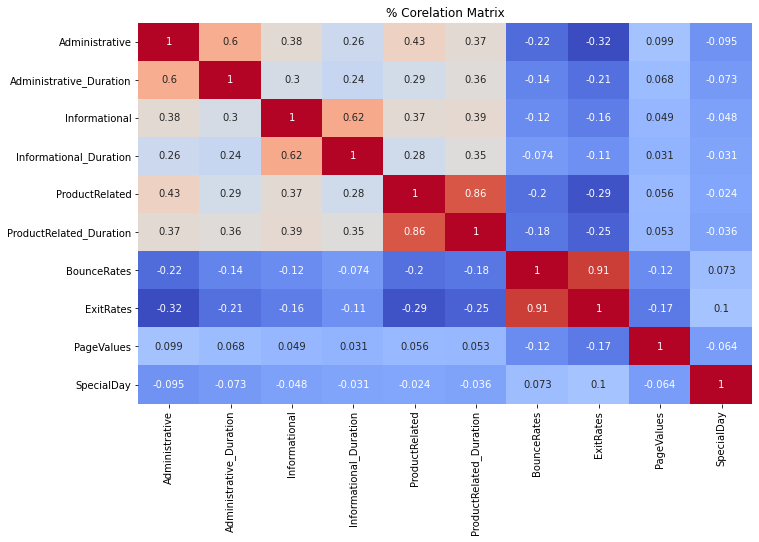

In [ ]:
plt.figure(figsize=(11,7))
sns.heatmap(cbar=False, annot=True, data=data_original[numerical_var].corr(), cmap='coolwarm')
plt.title('% Corelation Matrix')
plt.show()

Il apparaît que les couples **('ProductRelated', 'ProductRelated_Duration')**, **('BounceRates', 'ExitRates')** sont fortement correlés et que les couples **_('Administrative','Administrative_Duration')_**, **_('Informational','Informational_Duration')_** le sont que très légérement.

### Vérification de ces corrélations par des graphiques

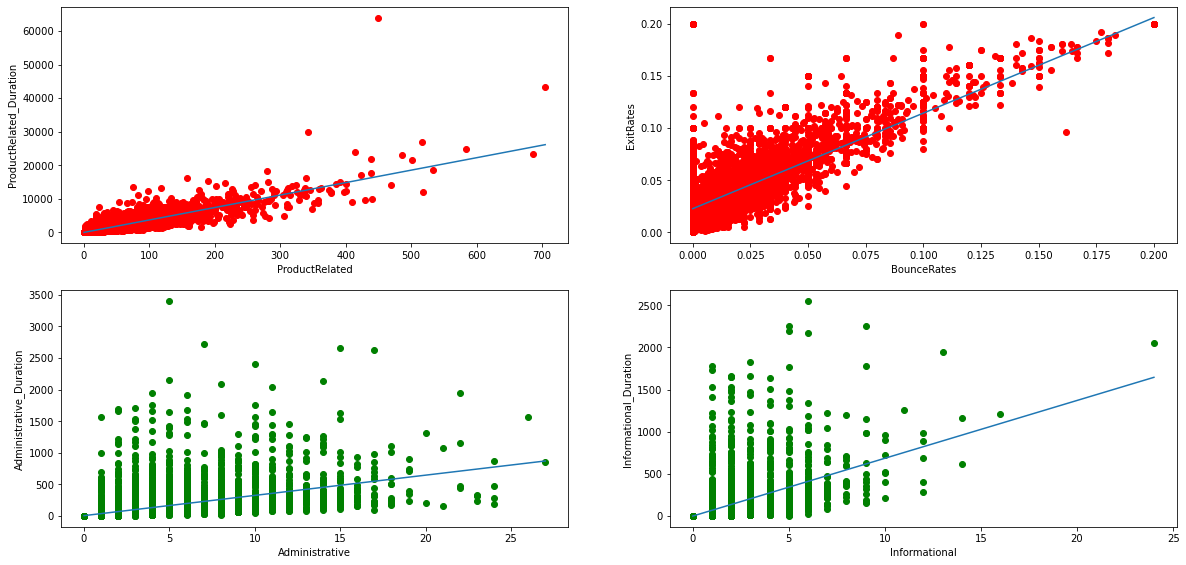

In [ ]:
col_x = ['ProductRelated', 'BounceRates', 'Administrative', 'Informational']
col_y = ['ProductRelated_Duration', 'ExitRates', 'Administrative_Duration', 'Informational_Duration' ]
color = ['red', 'red', 'green', 'green']

plt.figure(figsize=(20, 20))

for i, col in enumerate(col_x):
    plt.subplot(4,2,i+1)
    x = data_original[col]
    y = data_original[col_y[i]]
    plt.plot(x,y,'o',color = color[i])
    # création de la ligne de regression
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x,y,1))(np.unique(x)))
    plt.xlabel(col_x[i])
    plt.ylabel(col_y[i])

Les couples **('ProductRelated', 'ProductRelated_Duration')** et **('BounceRates', 'ExitRates')** sont effectivement très correlés, nous ne garderons qu'une variable de chaque couple, soit **'ProductRelated_Duration'** et **'BouceRates'**.

### Test de dépendance des variables numériques avec la variable cible catégorique avec l'ANOVA

In [ ]:
import statsmodels.api

# Liste des couples (Variable_numerique ~ Variable_cible)
liste = ['Administrative ~ Revenue', 'Administrative_Duration ~ Revenue', 'Informational ~ Revenue', 'Informational_Duration ~ Revenue',
      'ProductRelated_Duration ~ Revenue', 'BounceRates ~ Revenue', 'PageValues ~ Revenue', 'SpecialDay ~ Revenue']

for couple in liste:
    resultat = statsmodels.formula.api.ols(couple, data=data_original).fit()
    table = statsmodels.api.stats.anova_lm(resultat)
    print(couple,'------------------->',': P-value = ',table.loc['Revenue','PR(>F)'],'\n')

Administrative ~ Revenue -------------------> : P-value =  3.519759837714728e-54 

Administrative_Duration ~ Revenue -------------------> : P-value =  2.1465136347090738e-25 

Informational ~ Revenue -------------------> : P-value =  3.1740343112085765e-26 

Informational_Duration ~ Revenue -------------------> : P-value =  5.2828708606337516e-15 

ProductRelated_Duration ~ Revenue -------------------> : P-value =  6.115338253371342e-65 

BounceRates ~ Revenue -------------------> : P-value =  1.5941975384920247e-63 

PageValues ~ Revenue -------------------> : P-value =  0.0 

SpecialDay ~ Revenue -------------------> : P-value =  5.498934260139406e-20 



Avec une p-value inférieure à 5% soit 0.05 nous concluons que le couple de variable est significatif par rapport à la variable cible 'Revenue'. Il apparaît donc que les variables **`Administrative`**, **`Administrative_Duration`**, **`Informational`**, **`Informational_Duration`**, **`ProductRelated_Duration`**, **`BounceRates`**, **`PageValues`** et **`SpecialDay`** influent toutes sur la variable cible.

### **Etendue des classes de la variable cible 'Revenue'** sur l'effectif total de la population

[]

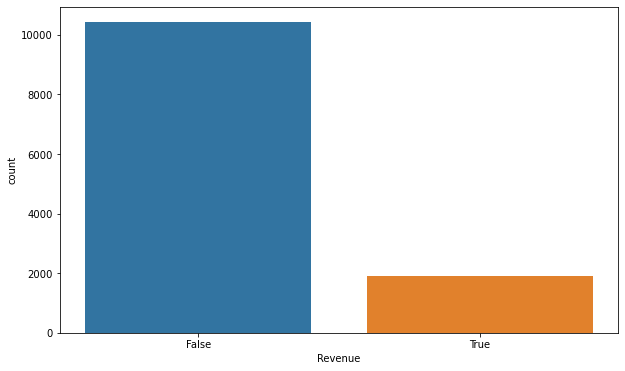

In [ ]:
# Graphique de  l'effectif de chaque classe de la variable cible 'Revenue'
plt.figure(figsize=(10,6))
sns.countplot(data=data_original,x='Revenue')
plt.plot()

### Boxplot des variables numériques par rapport aux classes de la varible cible 'Revenue'

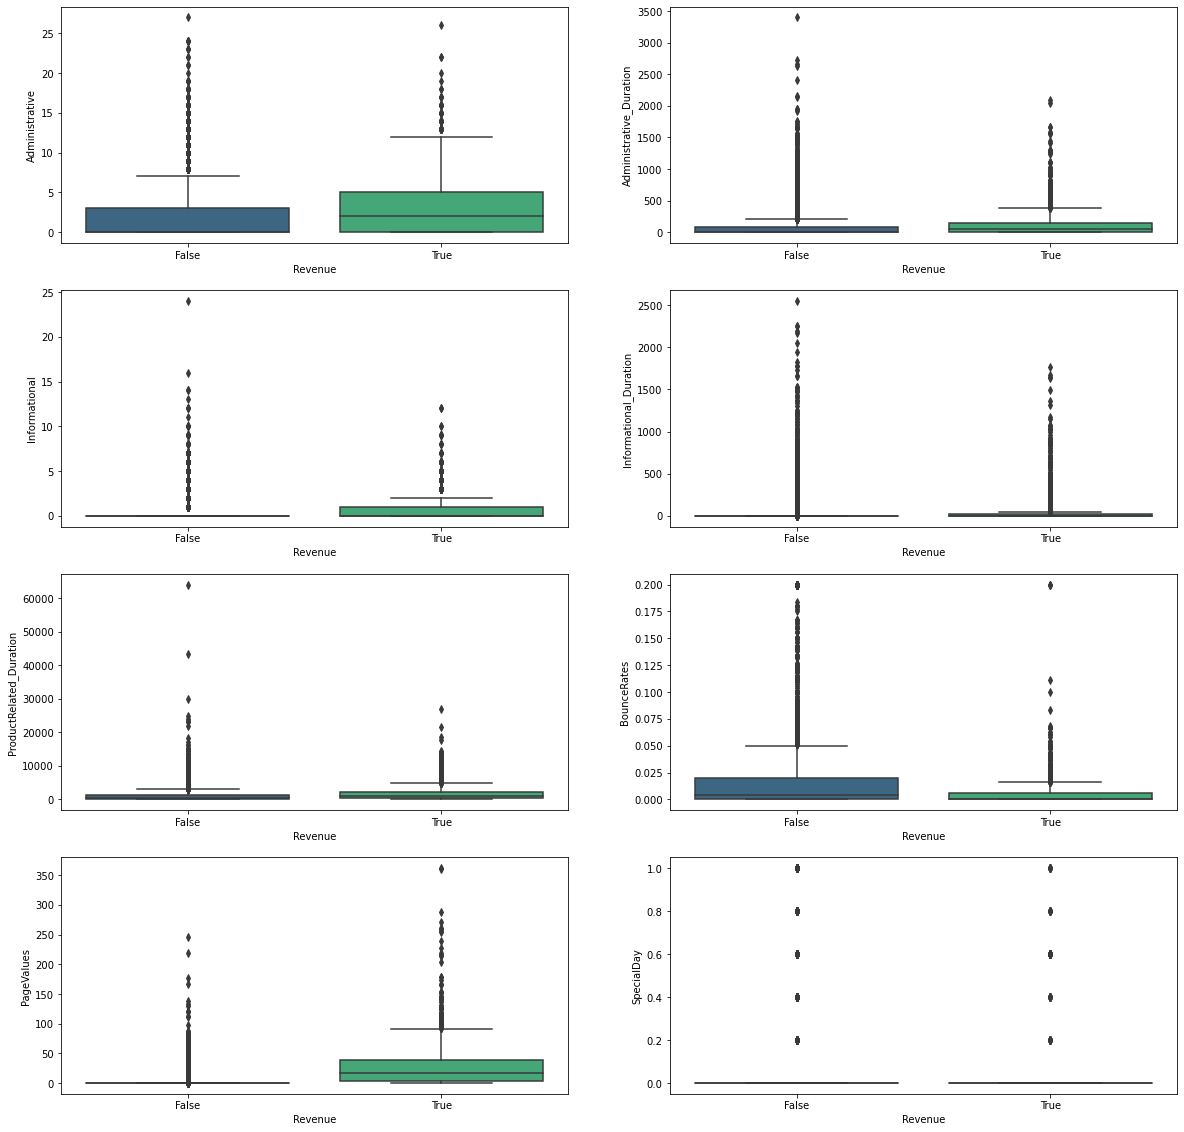

In [ ]:
numerical_var = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
           'ProductRelated_Duration', 'BounceRates', 'PageValues', 'SpecialDay']

plt.figure(figsize=(20,20))
for i, col in enumerate (numerical_var):
    plt.subplot(4,2,i+1)
    sns.boxplot(data=data_original,x='Revenue',y=col,palette='viridis')
    plt.plot()

**Après observation du graphique de l'étendu des classes de la cible 'Revenue' _(vaste étendu pour la classe 'False' et petit étendu pour la classe 'True)_, ces Boxplots qui nous renseignent sur la répartition des valeurs des différentes variables numériques dans les 2 classes de 'Revenue' nous confirment effectivement, de façon visuelle, les résultats de notre test d'ANOVA que sont la dépendance de la variable cible 'Revenue' avec toutes ces variables numériques.** 

### Estimation de la densité de noyau de la variable cible 'Revenue' par rapport aux varaibles numériques

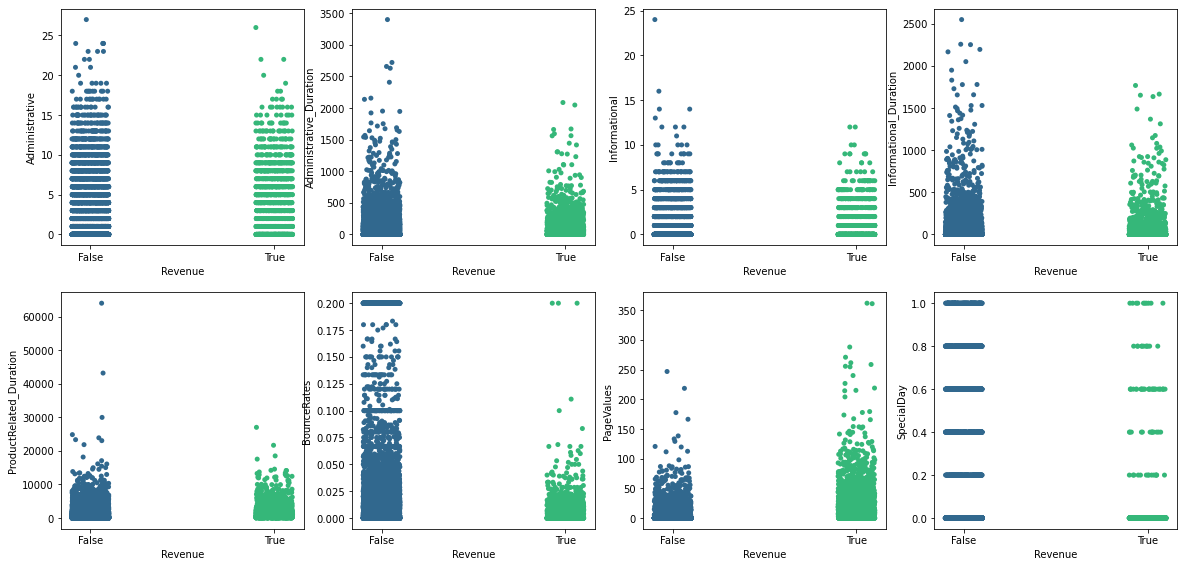

In [ ]:
plt.figure(figsize=(20,20))
for i, col in enumerate (numerical_var):
    plt.subplot(4,4,i+1)
    sns.stripplot(data=data_original,x='Revenue',y=col,palette='viridis')
    #sns.kdeplot(data=data_original,x='Revenue',y=col,cmap='viridis',cbar=True)
    plt.plot()

**L'estimation de la densité du noyau est Une autre façon visuelle d'observer la répartition des valeurs des différentes variables numériques dans les classes de la variable 'Revenue'**

# `Etude des variables catégorielles`

Les attributs catégoriels sont les suivants:

- **Month**
- **OperatingSystems**
- **Browser**
- **Region**
- **TrafficType**
- **VisitorType**
- **Weekend**
- **Revenue**


### Convertir les variables catégorielles en type 'category'

In [ ]:
data_original['Month'] = data_original['Month'].astype('category')
data_original['OperatingSystems'] = data_original['OperatingSystems'].astype('category')
data_original['Browser'] = data_original['Browser'].astype('category')
data_original['Region'] = data_original['Region'].astype('category')
data_original['TrafficType'] = data_original['TrafficType'].astype('category')
data_original['VisitorType'] = data_original['VisitorType'].astype('category')
data_original['Weekend'] = data_original['Weekend'].astype('category')
data_original['Revenue'] = data_original['Revenue'].astype('category')

### Tests de dépendance Chi2 des variables catégorielles avec la variable cible 'Revenue'

In [ ]:
variables = ['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend']
target = 'Revenue'

pvalue = {}
for var in variables:
    cont = data_original[[var, target]].pivot_table(index=var,columns=target,aggfunc=len)
    cont = cont.fillna(0)
    st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)
    pvalue[var] = st_p

pvalue

{'Month': 2.2387855164805443e-77,
 'OperatingSystems': 1.4160941129614401e-13,
 'Browser': 0.00608754317955109,
 'Region': 0.3214249979076556,
 'TrafficType': 1.652735258160153e-67,
 'VisitorType': 4.269904152293867e-30,
 'Weekend': 0.0012663251061221968}

Avec une p-value inférieure à 5% soit 0.05 nous concluons que la variable catégorielle est significative par rapport à la variable cible 'Revenue'. **La variable _'Region'_ a une p-value > 0.05, donc on peut conclure qu'elle n'a pas d'influence sur la variable cible**. Il apparaît donc que les variables **`Month`**, **`OperatingSystems`**, **`Browser`**, **`TrafficType`**, **`VisitorType`**, **`Weekend`**, influent sur **_'Revenue'_** et nous ne garderons que celles-là.

### Variables catégorielles Vs Variable cible 'Revenue':

**Diagramme en barres séparées, en effectifs.**


In [ ]:
# grouped bar chart

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.core.properties import value
from bokeh.transform import dodge
from bokeh.layouts import gridplot
output_notebook()

categorical_var = ['Month','OperatingSystems','Browser','TrafficType','VisitorType','Weekend']
grouped_bar = [] 

for i in range (len(categorical_var)):
    cont = data_original[[categorical_var[i], 'Revenue']].pivot_table(index=categorical_var[i],columns='Revenue',aggfunc=len)
    
    # data
    categories = cont.index.to_list()
    categories = [str(ind) for ind in categories]
    grouped_bar_df = pd.DataFrame({'categories' : categories,
                                   'False': cont[False].to_list(),
                                   'True': cont[True].to_list()})

    max1 = max(cont[False].to_list())
    max2 = max(cont[True].to_list())
    maximum = max((max1, max2))


    # plot
    grouped_bar.append(None)
    grouped_bar[i] = figure(x_range=categories, y_range=(0, maximum+250), plot_height=250)

    # offsets bars / bar locations on axis
    dodge1 = dodge('categories', -0.15, range=grouped_bar[i].x_range)
    dodge3 = dodge('categories',  0.10, range=grouped_bar[i].x_range)

    grouped_bar[i].vbar(x=dodge1, top='False', width=0.2, source=grouped_bar_df, color='olive', legend_label='False')
    grouped_bar[i].vbar(x=dodge3, top='True', width=0.2, source=grouped_bar_df, color='indigo', legend_label='True')

    # format legend.legend.location = 'top_left'
    grouped_bar[i].legend.orientation = 'horizontal'

grid = gridplot([[grouped_bar[0], grouped_bar[1]], 
                 [grouped_bar[2], grouped_bar[3]],
                 [grouped_bar[4], grouped_bar[5]]], )

show(grid)

Loading BokehJS ...

**Ces graphes montrent la répartition des classes de chaque variable catégorielle dans les 2 classes de la variables cible 'Revenue'.**

# `Data preprocessing`

### Features  selection

On peut retirer les variables qui ne serveront pas: ce sont **'ProductRelated'** et **'ExitRates'** pour les variables numériques et la variable **'Region'** pour les variables catégorielles. 

In [ ]:
data_new = data_original.copy()

del(data_new['ProductRelated'])
del(data_new['ExitRates'])
del(data_new['Region'])

#data_new.info()

### Création de nouvelles variables à partir de variables existantes

Nous créons 2 nouvelles variables à partir des variables déjà existantes:
- **ratio_administrative**: C'est le ratio des variables Administrative_Duration et Administrative, correlées à 0.6. La nouvelle variable peut être interpretée comme le temps passé par page dans la catégorie Administrative.
- **ratio_informational**: C'est le ratio des variables Informational_Duration et Informational, correlées à 0.62. La nouvelle variable peut être interpretée comme le temps passé par page dans la catégorie Informational.

In [ ]:
data_new['ratio_administrative'] = data_new['Administrative_Duration']/data_new['Administrative']
data_new['ratio_administrative'] = data_new['ratio_administrative'].fillna(0)

data_new['ratio_informational'] = data_new['Informational_Duration']/data_new['Informational']
data_new['ratio_informational'] = data_new['ratio_informational'].fillna(0)

# Suppression des varaibles qui nous ont servi à en créer de nouvelles
del(data_new['Administrative'])
del(data_new['Administrative_Duration'])
del(data_new['Informational'])
del(data_new['Informational_Duration'])

data_new.head()

,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,TrafficType,VisitorType,Weekend,Revenue,ratio_administrative,ratio_informational
0,0.000000,0.20,0.0,0.0,Feb,1,1,1,Returning_Visitor,False,False,0.0,0.0
1,64.000000,0.00,0.0,0.0,Feb,2,2,2,Returning_Visitor,False,False,0.0,0.0
2,0.000000,0.20,0.0,0.0,Feb,4,1,3,Returning_Visitor,False,False,0.0,0.0
3,2.666667,0.05,0.0,0.0,Feb,3,2,4,Returning_Visitor,False,False,0.0,0.0
4,627.500000,0.02,0.0,0.0,Feb,3,3,4,Returning_Visitor,True,False,0.0,0.0


### Dummies variables à partir des variables catégorielles

In [ ]:
# Variable 'Month'
dummies = pd.get_dummies(data_new['Month'],drop_first=True, prefix='Month', prefix_sep='_')
data_new = pd.concat([data_new, dummies], axis=1)
del(data_new['Month'])

# Variable 'OperatingSystems'
dummies = pd.get_dummies(data_new['OperatingSystems'],drop_first=True, prefix='OperatingSystems', prefix_sep='_')
data_new = pd.concat([data_new, dummies], axis=1)
del(data_new['OperatingSystems'])

# Variable 'Browser'
dummies = pd.get_dummies(data_new['Browser'],drop_first=True, prefix='browser', prefix_sep='_')
data_new = pd.concat([data_new, dummies], axis=1)
del(data_new['Browser'])

# Variable 'TrafficType'
dummies = pd.get_dummies(data_new['TrafficType'],drop_first=True, prefix='TrafficType', prefix_sep='_')
data_new = pd.concat([data_new, dummies], axis=1)
del(data_new['TrafficType'])

# Variable 'VisitorType'
dummies = pd.get_dummies(data_new['VisitorType'],drop_first=True, prefix='VisitorType', prefix_sep='_')
data_new = pd.concat([data_new, dummies], axis=1)
del(data_new['VisitorType'])

# Variable 'Weekend'
dummies = pd.get_dummies(data_new['Weekend'],drop_first=True, prefix='Weekend', prefix_sep='_')
data_new = pd.concat([data_new, dummies], axis=1)
del(data_new['Weekend'])

# Juste remettre la colonne de la variable target à la fin et le convertir en 1 et 0
temp = data_new['Revenue']
del(data_new['Revenue'])
data_new['Revenue'] = temp
data_new['Revenue'] = data_new['Revenue'].astype('int')

data_new.head()

,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,ratio_administrative,ratio_informational,Month_Dec,Month_Feb,Month_Jul,Month_June,...,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True,Revenue
0,0.000000,0.20,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,64.000000,0.00,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.000000,0.20,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2.666667,0.05,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,627.500000,0.02,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [ ]:
features = data_new.iloc[:,0:56].columns.to_list()
target = 'Revenue'

### Partionnement des données en set de train et set de test

In [ ]:
X = data_new.iloc[:,0:56].values
Y = data_new.iloc[:,56].values


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0, stratify=Y)

### Normalisation des données

In [ ]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

# `Modelisation`

## (1) Modèle KNN

Text(0, 0.5, 'score')

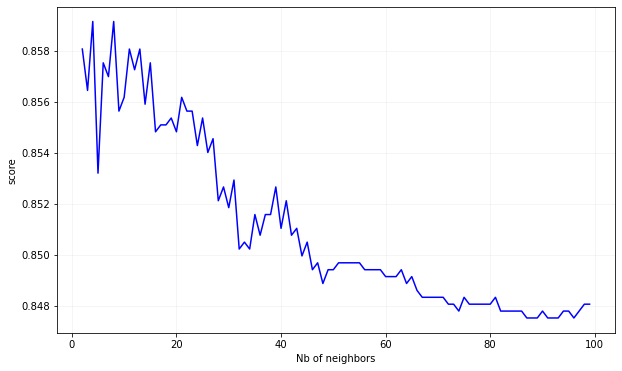

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Liste de différentes valeurs pour le parametre n_neighbors
n_neighbors_list = np.arange(2,100)
# Liste des scores obtenus pour chaque valeur de n_neighbors
score_list = []

plt.figure(figsize=(10, 6))

for n in n_neighbors_list:
    # Créer d'une instance du modèle
    knn_model = KNeighborsClassifier(n_neighbors=n)
    # Entrainement du modèle
    knn_model.fit(X_train, y_train)

    # Prédictions et score
    predictions = knn_model.predict(X_test)
    score_list.append(knn_model.score(X_test, y_test))

plt.plot(n_neighbors_list, score_list, color='blue')
plt.grid(alpha=0.15)
plt.xlabel('Nb of neighbors')
plt.ylabel('score')

In [ ]:
print('Score max: ', max(score_list))
print('Nb of neighbors: ', n_neighbors_list[score_list.index(max(score_list))])

Score max:  0.8591511219248446
Nb of neighbors:  4


### Cross validation

Text(0, 0.5, 'score')

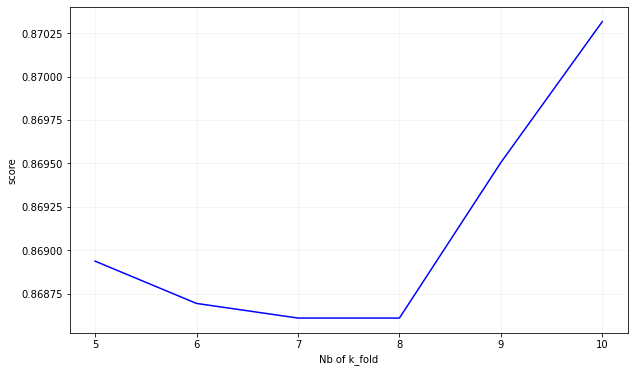

In [ ]:
# Modèle KNN avec la meilleur valeur pour le paramètre n_neighbors
knn_model = KNeighborsClassifier(n_neighbors=4)

# Liste de différentes valeurs de k_fold
cv_grid = np.arange(5,11)
# Liste des scores obtenus pour chaque valeur du paramètre cv
score_list = []

plt.figure(figsize=(10, 6))

for val in cv_grid:
    score = cross_val_score(knn_model, X, Y, cv = val)
    score = np.mean(score) # Moyenne de tous les scores obtenus
    score_list.append(score)
    
plt.plot(cv_grid, score_list, color='blue')
plt.grid(alpha=0.15)
plt.xlabel('Nb of k_fold')
plt.ylabel('score')

In [ ]:
print('Score max: ', max(score_list), '----> Nb de k-fold =', cv_grid[score_list.index(max(score_list))])
print('Mean of scores', np.mean(score_list))

Score max:  0.870316301703163 ----> Nb de k-fold = 10
Mean of scores 0.8691122203757641


##### Avec un nombre de f-Fold entre 5 et 10 et en fixant le paramètre n_neighbors à 4, nous obtenons un score moyen de 0.8691 avec un algorithme de KNN

## (2) Modèle de regression logistique

In [ ]:
from sklearn.linear_model import LogisticRegression

# Créer d'une instance du modèle
logistic_model = LogisticRegression(solver='liblinear')

# Entrainement du modèle
logistic_model.fit(X_train, y_train)

# Prédictions
y_pred = logistic_model.predict(X_test)

In [ ]:
# Evaluation du modèle

from sklearn.metrics import confusion_matrix

print('Score: ', logistic_model.score(X_train, y_train))

cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(data=cm, columns=['False', 'True'], index=['real_False','real_True'])
cm

Score:  0.8748696558915537


,False,True
real_False,3091,36
real_True,422,150


In [ ]:
TP = cm.loc['real_True','True']
TN = cm.loc['real_False','False']
FP = cm.loc['real_False', 'True']
FN = cm.loc['real_True', 'False']

In [ ]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
print('accuracy = ',accuracy)
precision = TP/(TP+FP)
print('Precision = ',precision)

accuracy =  0.8761827520951608
Precision =  0.8064516129032258


### Cross validation

Text(0, 0.5, 'score')

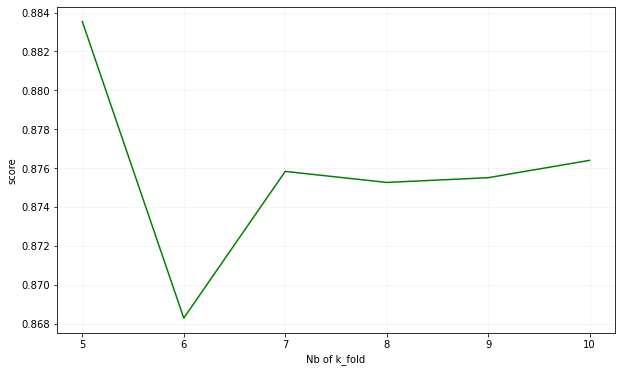

In [ ]:
from sklearn.model_selection import cross_val_score

# Liste de différentes valeurs de k_fold
cv_grid = np.arange(5,11)
# Liste des scores obtenus pour chaque valeur du paramètre cv
score_list = []

plt.figure(figsize=(10, 6))

for val in cv_grid:
    score = cross_val_score(logistic_model, X, Y, cv = val)
    score = np.mean(score) # Moyenne de tous les scores obtenus
    score_list.append(score)
    
plt.plot(cv_grid, score_list, color='green')
plt.grid(alpha=0.15)
plt.xlabel('Nb of k_fold')
plt.ylabel('score')

In [ ]:
print('Score max: ', max(score_list), '----> Nb de k-fold =', cv_grid[score_list.index(max(score_list))])
print('Mean of scores', np.mean(score_list))

Score max:  0.8835360908353609 ----> Nb de k-fold = 5
Mean of scores 0.875804177170029


##### Avec un nombre de f-Fold entre 5 et 10, nous obtenons un score moyen de 0.8758 avec un algorithme LogisticRegession

## (3) Arbre de décision de classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
#Nous initialisons ensuite un DecisionTreeClassifierobjet avec deux arguments.
decTree_model = DecisionTreeClassifier(criterion='gini', random_state=50)

#Enfin, nous ajustons le modèle sur les données d’entraînement
decTree_model.fit(X_train, y_train)

# évaluons sa précision sur les données de test.
decTree_model.score(X_test, y_test)

0.863206271965396

In [ ]:
# Prédictions
y_pred = decTree_model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(data=cm, columns=['False', 'True'], index=['real_False','real_True'])
cm

,False,True
real_False,2857,270
real_True,236,336


### Concept de Réglage des Hyperparamètres pour l'arbre de Décision.

- Profondeur maximale
- Min samples leaf

In [ ]:
#Creation de grille des differents hyperparameters

grid_params = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08]
}

In [ ]:
# Nous créons un GridSearchCVobjet avec le classifieur de l’arbre de décision comme estimateur

grid_object = GridSearchCV(estimator = decTree_model, param_grid = grid_params, scoring = 'accuracy', cv = 10)

In [ ]:
# Nous ajustons ensuite cet objet de grille aux données d'apprentissage
grid_object.fit(X, Y)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=6,
                                              min_samples_leaf=0.01,
                                              random_state=50),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [0.01, 0.015, 0.02, 0.025, 0.03,
                                              0.053, 0.04, 0.05, 0.06, 0.08]},
             scoring='accuracy')

In [ ]:
#Extraction des meilleures parametres
grid_object.best_params_
#grid_object.score(X, Y)

{'max_depth': 6, 'min_samples_leaf': 0.01}

### Instancier de nouveau le modèle avec ces paramètres optimaux

In [ ]:
decTree_model = DecisionTreeClassifier(criterion='gini', max_depth=grid_object.best_params_['max_depth'], 
                                       min_samples_leaf=grid_object.best_params_['min_samples_leaf'], random_state=50)

### Cross validation sur cette nouvelle instance de modèle

Text(0, 0.5, 'score')

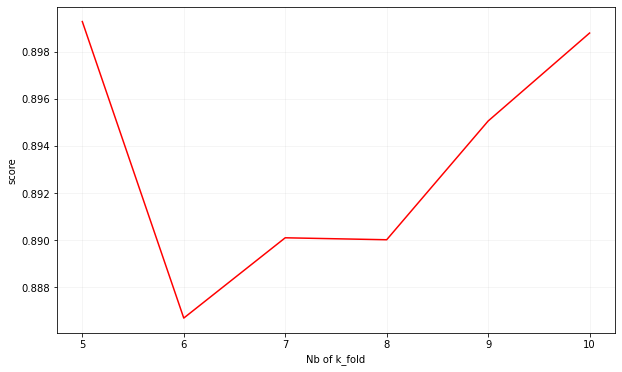

In [ ]:
# Liste de différentes valeurs de k_fold
cv_grid = np.arange(5,11)

# Liste des scores obtenus pour chaque valeur du paramètre cv
score_list = []

plt.figure(figsize=(10, 6))

for val in cv_grid:
    score = cross_val_score(decTree_model, X, Y, cv = val)
    score = np.mean(score)
    score_list.append(score)
plt.plot(cv_grid, score_list, color='red')
plt.grid(alpha=0.15)
plt.xlabel('Nb of k_fold')
plt.ylabel('score')

In [ ]:
print('Score max: ', max(score_list), '----> Nb de k-fold =', cv_grid[score_list.index(max(score_list))])
print('Mean of scores', np.mean(score_list))

Score max:  0.8992700729927007 ----> Nb de k-fold = 5
Mean of scores 0.8933212442230349


##### Avec un nombre de f-Fold entre 5 et 10, et avec les paramètres 'max_depth': 6 et 'min_samples_leaf': 0.01 nous obtenons un score moyen de 0.8933 avec un algorithme DecisionTreeClassifier

In [ ]:
# Le Modèle:

decTree_model = DecisionTreeClassifier(criterion='gini', max_depth=grid_object.best_params_['max_depth'], 
                                       min_samples_leaf=grid_object.best_params_['min_samples_leaf'], random_state=50)

decTree_model.fit(X, Y)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=0.01, random_state=50)